<a href="https://colab.research.google.com/github/GeoEngnn/Senti_/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment analysis using python-**

*1st appraoch :VADER(Valence Aware Dictionary and Sentiment Reasoner)* -traditional way or bag of words approach

*2nd way: Using pretrained model Roberta from hugging face*

*3rd way :Using hugging face pipeline*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk


In [2]:
df = pd.read_csv('/content/Reviews.csv', on_bad_lines='skip', engine='python')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [5]:
print(df.shape)

(16243, 10)


In [6]:
df['Score']

,Score
0,5.0
1,1.0
2,4.0
3,2.0
4,5.0
...,...
16238,3.0
16239,4.0
16240,5.0
16241,5.0


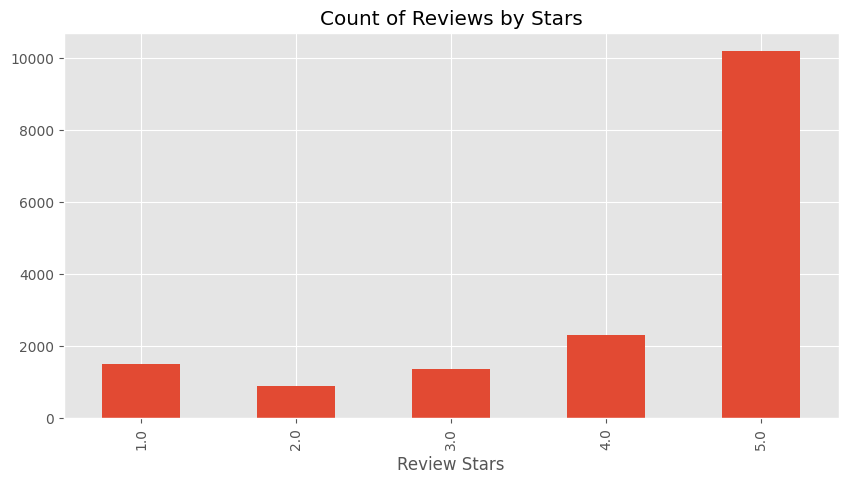

In [7]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by Stars',figsize = (10,5))
ax.set_xlabel('Review Stars')
plt.show()

In [8]:
example = df['Text'].values[50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [9]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:
tokens =nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [11]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [12]:
tagged =nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [13]:
import nltk
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [14]:
entities =nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


**Using Vader Approach**

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [16]:
sia

In [17]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [18]:
sia.polarity_scores('This is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [19]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [20]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
16238,16239,B007TJGZ54,A20F61CCJ2Q7FZ,Gwynne Johnson,0.0,0.0,3.0,1.340410e+09,diappointed,"The product was not in original packages, only..."
16239,16240,B007TJGZ54,A2FBOBFV6XJ8Y0,Ronald L. Kelley,0.0,0.0,4.0,1.339891e+09,a little bitter but ok,this is the least strong and bitter coffee I c...
16240,16241,B007TJGZ54,A1PLASEQUSPDPM,Chris,0.0,0.0,5.0,1.339718e+09,Price is Right,Love the Green Mountain Coffee; tastes great i...
16241,16242,B007TJGZ54,A19TEEHU4WNZ40,Beans,0.0,0.0,5.0,1.339632e+09,K-lips,Very good price and excellent coffee.. Packed ...


In [22]:
# Run the polarity score on the entire dataset
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    if text is not None:  # Check if text is not None
        res[myid] = sia.polarity_scores(text)

  0%|          | 0/16243 [00:00<?, ?it/s]

In [23]:
vaders_result = pd.DataFrame(res).T


In [24]:
vaders = vaders_result.merge(df, how='left', left_index=True, right_on='Id')

In [25]:
vaders.head()

,neg,neu,pos,compound,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0.000,0.695,0.305,0.9441,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0.138,0.862,0.000,-0.5664,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,0.091,0.754,0.155,0.8265,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,0.000,1.000,0.000,0.0000,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,0.000,0.552,0.448,0.9468,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


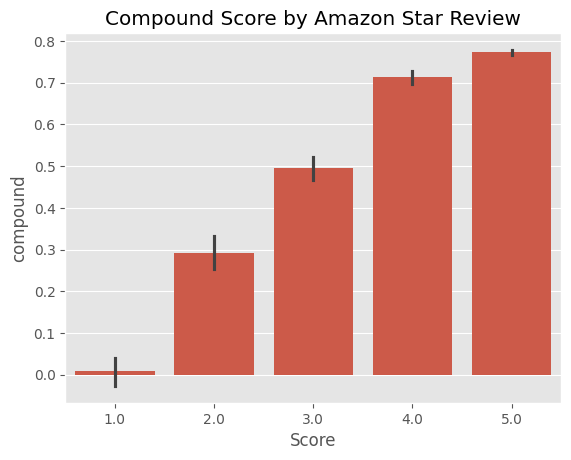

In [26]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

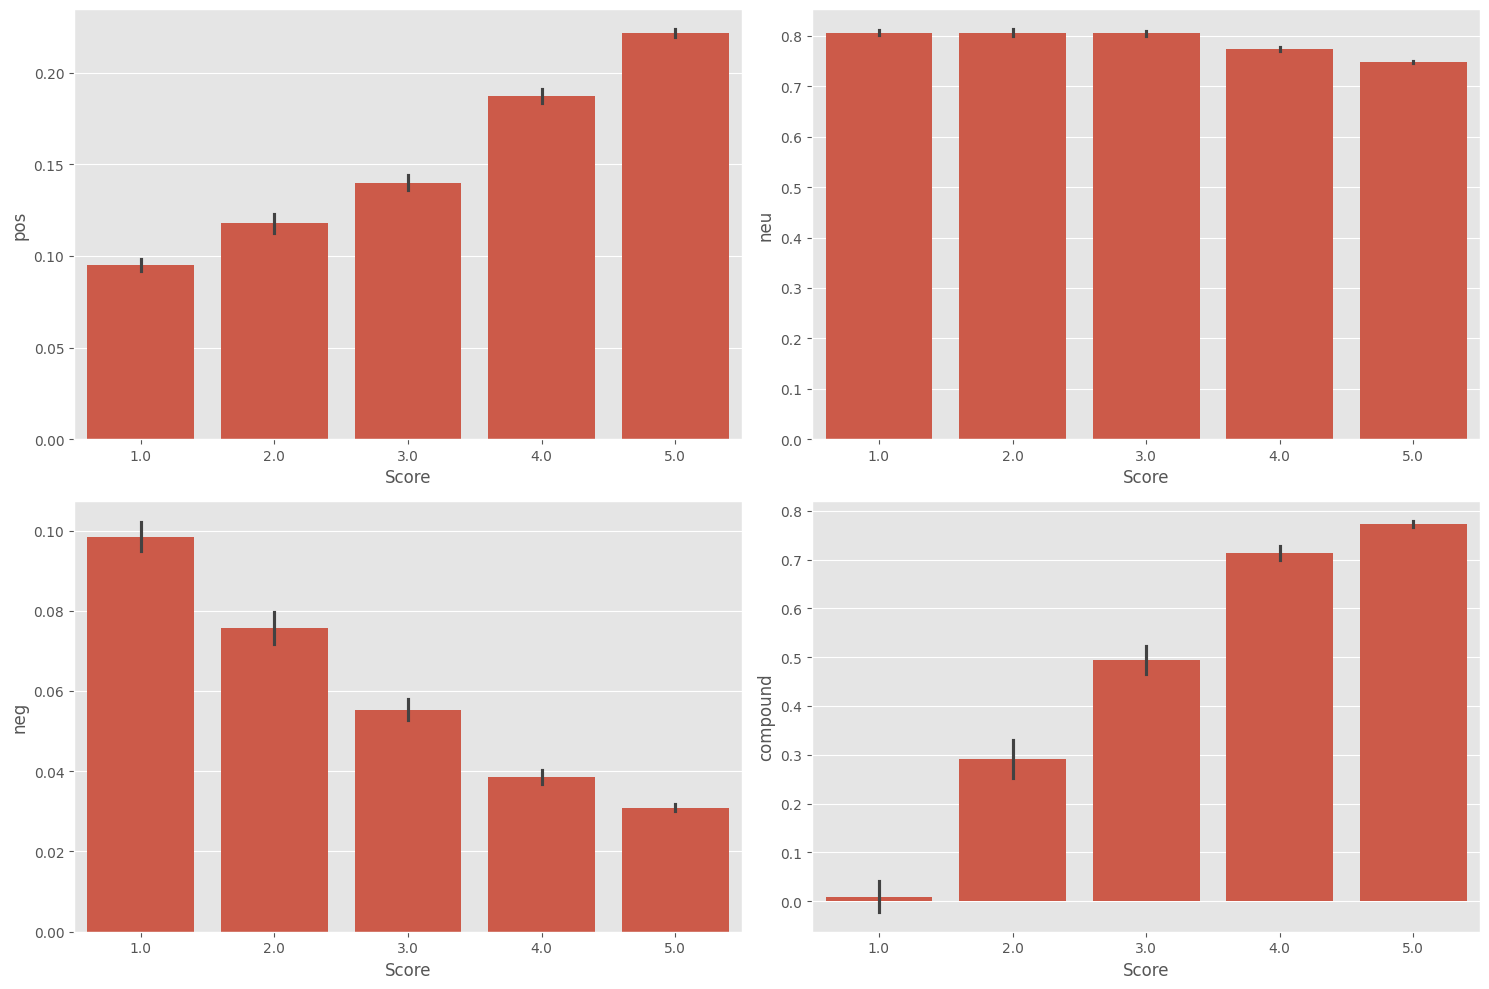

In [27]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0,0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[0,1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[1,0])
sns.barplot(data=vaders, x='Score', y='compound', ax=axs[1,1])
plt.tight_layout()
plt.show()

**Using Roberta**

In [28]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [29]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [30]:
# Vader results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [31]:
 # Run for Roberta Model
 encoded_text = tokenizer(example, return_tensors='pt')
 output = model(**encoded_text)
 scores = output[0][0].detach().numpy()
 scores = softmax(scores)
 scores_dict = {
     'roberta_neg':scores[0],
     'roberta_neu':scores[1],
     'roberta_pos':scores[2]
 }
 print(scores_dict)

{'roberta_neg': np.float32(0.97635514), 'roberta_neu': np.float32(0.020687465), 'roberta_pos': np.float32(0.0029573706)}


In [35]:
def polarity_scores_roberta(example):
  # Truncate text to be within the model's max length
  max_len = tokenizer.model_max_length
  encoded_text = tokenizer(example[:max_len], return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'roberta_neg':scores[0],
      'roberta_neu':scores[1],
      'roberta_pos':scores[2]
  }
  return scores_dict

In [38]:
vaders_result

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
16238,0.000,0.643,0.357,0.9773
16239,0.125,0.875,0.000,-0.2803
16240,0.213,0.721,0.066,-0.7281
16241,0.000,0.679,0.321,0.9522


In [39]:
roberta_result

{'roberta_neg': np.float32(0.0016396265),
 'roberta_neu': np.float32(0.01454312),
 'roberta_pos': np.float32(0.9838172)}

In [40]:
both

{'neg': 0.0,
 'neu': 0.607,
 'pos': 0.393,
 'compound': 0.9061,
 'roberta_neg': np.float32(0.0016396265),
 'roberta_neu': np.float32(0.01454312),
 'roberta_pos': np.float32(0.9838172)}

In [36]:
res ={}
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result, **roberta_result}
    res[myid] = both
  except Exception as e:
    print(f'Broke for id {myid} with error: {e}')

  0%|          | 0/16243 [00:00<?, ?it/s]

Broke for id 83 with error: The expanded size of the tensor (571) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 571].  Tensor sizes: [1, 514]
Broke for id 187 with error: The expanded size of the tensor (546) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 546].  Tensor sizes: [1, 514]
Broke for id 529 with error: The expanded size of the tensor (639) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 639].  Tensor sizes: [1, 514]
Broke for id 540 with error: The expanded size of the tensor (1386) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1386].  Tensor sizes: [1, 514]
Broke for id 746 with error: The expanded size of the tensor (705) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 705].  Tensor sizes: [1, 514]
Broke for id 863 with error: The expanded size of the tensor (605) must match the existing siz

In [37]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df, how='left')

In [41]:
results_df.head()

,Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


**Compare Scores between models**

In [42]:
results_df.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

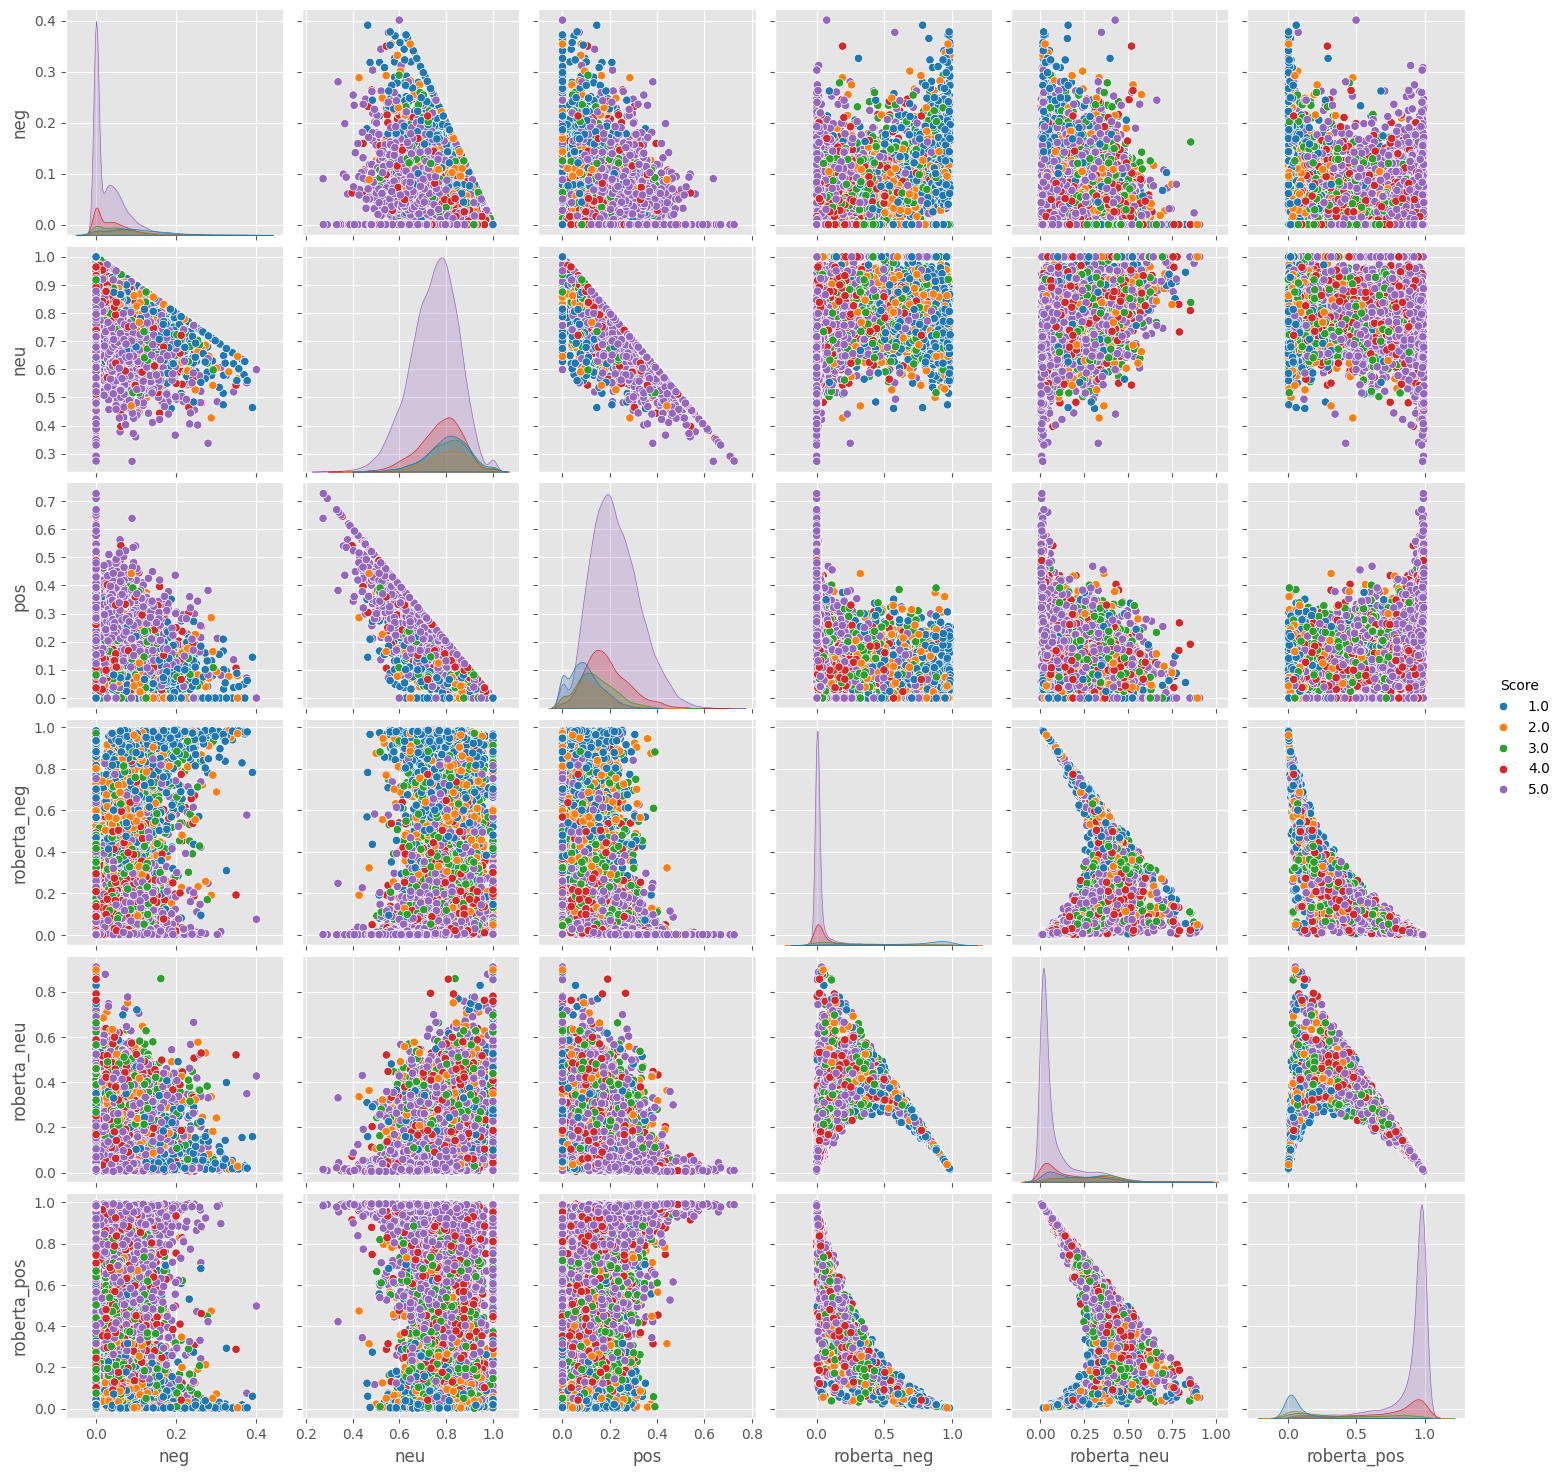

In [44]:
sns.pairplot(data=results_df,
             vars=['neg', 'neu', 'pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score',
             palette='tab10')
plt.show()

*Compared to the **VADER model**, the **RoBERTa model** generally performs **better at predicting sentiment**
**based** on the overall **meaning and context of sentences** *.

*So for comparing between vader and roberta models we are going to take reviews with score 1 and having the high positivity score*

This flavor is horrible.  There are many other flavors much better.  Hawaiian Hazelnut is great!  Breakfast in Bed is AWesome! **As in Vader model here in the sentence it has words like better ,great and awesome and only a single neg word it considers the sentence with more of a positivity look as it uses a bag of words approach**

In [45]:
results_df.query('Score == 1').sort_values('pos',ascending=False)['Text'].values[0]

'This flavor is horrible.  There are many other flavors much better.  Hawaiian Hazelnut is great!  Breakfast in Bed is AWesome!'

Even though the review is very bad it has still got the the positivity score in vader model

In [48]:
results_df.query('Score == 1') \
.sort_values('roberta_pos',ascending=False)['Text'].values[0]

'Bisquick GF is easy to use. Pancakes and muffins are very<br />tasty. The product is quick and easy to use. It makes my day.  Gram'

here in the roberta model the entire statement is not negative it has got some positivity

In [52]:
results_df.query('Score == 5') \
.sort_values('roberta_neg',ascending=False)['Text'].values[0]

'THEY ARE DELICIOUS NOT SALTY YOU CAN SIT AND EAT 2-3 2 OUNCE BAGS AT A TIME I GIVE THESE 5 STARS PLUS I HAVE TO STOP MYSELF FROM EATING THEM THEY ARE DELICIOUS.'

In [53]:
results_df.query('Score == 5').sort_values('neg',ascending=False)['Text'].values[0]

'pure smooth not sugar sweet, best for the price since Sams club stop selling syrup'

In [54]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [55]:
sent_pipeline('i love icecream if it is not rainy')

[{'label': 'POSITIVE', 'score': 0.9909847974777222}]

In [56]:
sent_pipeline('today is a bad day for me')

[{'label': 'NEGATIVE', 'score': 0.9997188448905945}]

In [57]:
sent_pipeline('she scolded me but gave me a hug')

[{'label': 'POSITIVE', 'score': 0.9993317723274231}]

In [59]:
sent_pipeline('he punished me but for my good')

[{'label': 'NEGATIVE', 'score': 0.8301747441291809}]

In [77]:
!pip install streamlit pyngrok vaderSentiment transformers torch scipy

In [78]:
%%writefile app.py
import streamlit as st
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from scipy.special import softmax
import numpy as np

# Title
st.title("Sentiment Analysis App")
st.write("Analyze text sentiment using VADER and RoBERTa models.")

# Text input
user_input = st.text_area("Enter text to analyze")

# --- VADER Sentiment Analysis ---
def vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return "Positive 😊", scores
    elif scores['compound'] <= -0.05:
        return "Negative 😠", scores
    else:
        return "Neutral 😐", scores

# --- RoBERTa Sentiment Analysis ---
@st.cache_resource
def load_roberta_model():
    model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    return tokenizer, model

def roberta_sentiment(text):
    tokenizer, model = load_roberta_model()
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output.logits.detach().numpy()[0]
    scores = softmax(scores)
    labels = ['Negative 😠', 'Neutral 😐', 'Positive 😊']
    return labels[np.argmax(scores)], dict(zip(labels, scores))

# --- Run Analysis ---
if st.button("Analyze Sentiment"):
    if user_input.strip():
        vader_result, vader_scores = vader_sentiment(user_input)
        roberta_result, roberta_scores = roberta_sentiment(user_input)

        st.subheader("VADER Result")
        st.write(f"**Prediction:** {vader_result}")
        st.json(vader_scores)

        st.subheader("RoBERTa Result")
        st.write(f"**Prediction:** {roberta_result}")
        st.json(roberta_scores)
    else:
        st.warning("Please enter some text to analyze!")


Overwriting app.py


In [81]:
!ngrok config add-authtoken 33KGu5vWpdgZ9vA1gKN9qeQT1Vn_dAYACajqk7eukG6iJKCp

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [82]:
!streamlit run app.py &>/dev/null&


In [83]:
from pyngrok import ngrok

# Create tunnel to port 8501
public_url = ngrok.connect(8501)
print("Access your Sentiment Analysis app here:", public_url)

Access your Sentiment Analysis app here: NgrokTunnel: "https://liz-phasic-overpessimistically.ngrok-free.dev" -> "http://localhost:8501"
